<a href="https://colab.research.google.com/github/DanielGemayel/Machine-Learning-Final/blob/main/Daniel_Gemayel_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stablishing which machine learning algorthim is the best tool for prediciting the alcohol content of white wine utilizing the database provided.**

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
#df = pd.read_csv('winequality-white.csv',sep=";" ,names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df=pd.read_csv('https://archive.ics.uci.edu/static/public/186/data.csv')
#df
df = df[df.color != 'red']
#df
y=df[['alcohol']]   # Target

X=df[df.columns.drop(['color','alcohol'])] #Features


In [21]:
# For testing the models
from sklearn.model_selection import train_test_split

# 30% test, 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


**Linear Regression**

**Doing Train/Test split for regression**

In [58]:

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
Result_reg= reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9016030894084577
Root Mean Squared Error: 0.3867387092969957


**Cross Validation**

In [39]:
from sklearn.model_selection import cross_val_score


# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 5-Fold CV Score: {}".format(np.std(cv_scores)))

[-0.17198488 -0.21075245 -0.4470046  -0.14270688 -0.12892165]
Average 5-Fold CV Score: -0.22027409047005447
Standard Deviation of 5-Fold CV Score: 0.11678285307275493


**Ridge==> Finding the best value of alpha**

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Setup the array of alphas and lists to store scores
alpha_space = {'alpha': np.logspace(-5, 0, 50)}
# Create a ridge regressor: ridge
ridge = Ridge()
ridge_cv = GridSearchCV (ridge, alpha_space , cv=20,scoring='neg_mean_squared_error')

#fit model to data
ridge_cv.fit(X, y)
print(ridge_cv.best_params_)
print(f"neg_mean_squared_error={ridge_cv.best_score_}")

{'alpha': 0.00010481131341546853}
neg_mean_squared_error=-0.20984524399431886


**Ridge fit performance with the selected alpha under cross validation**

In [41]:
ridge_test=Ridge(alpha=0.00010481131341546853)

cv_scores = cross_val_score(ridge_test,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 5-Fold CV Score: {}".format(np.std(cv_scores)))



[-0.17595603 -0.21038465 -0.43542501 -0.146663   -0.1328889 ]
Average 5-Fold CV Score: -0.22026351852684983
Standard Deviation of 5-Fold CV Score: 0.11082109176297729


**Lasso **

In [43]:
from sklearn.linear_model import Lasso

alpha_space = {'alpha': np.logspace(-5, 0, 50)}
lasso=Lasso()
lasso_cv=GridSearchCV (lasso, alpha_space , cv=20,scoring='neg_mean_squared_error')
lasso_cv.fit(X,y)

print(lasso_cv.best_params_)
print(f"neg_mean_squared_error={lasso_cv.best_score_}")


{'alpha': 1.2648552168552958e-05}
neg_mean_squared_error=-0.20993153978562762


**Lasso fit performance with the selected alpha under cross validation**

In [44]:
lasso_test=Lasso(alpha=1.2648552168552958e-05)
cv_scores = cross_val_score(lasso_test,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 5-Fold CV Score: {}".format(np.std(cv_scores)))


[-0.17475439 -0.21039959 -0.4393253  -0.14553934 -0.13179209]
Average 5-Fold CV Score: -0.22036214194045503
Standard Deviation of 5-Fold CV Score: 0.11275397062322282


**Linear Regression: Parametric Regression**

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_R = LinearRegression()
cv_scores = cross_val_score(linear_R,X,y,cv=5,scoring='neg_mean_squared_error')


print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Standard Deviation of 5-Fold CV Score: {}".format(np.std(cv_scores)))

[-0.17198488 -0.21075245 -0.4470046  -0.14270688 -0.12892165]
Average 5-Fold CV Score: -0.22027409047005447
Standard Deviation of 5-Fold CV Score: 0.11678285307275493


**Decision Tree**

In [74]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Classifier with max depth of 2
clf = DecisionTreeRegressor()

# Fit the model to the data
clf.fit(X, y)

from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)
importance = clf.feature_importances_

for i in range(0,len(X.columns)):

  print( "Feature importance for {} = {}".format(X.columns[i],importance[i]))


|--- density <= 0.99
|   |--- density <= 0.99
|   |   |--- density <= 0.99
|   |   |   |--- density <= 0.99
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- free_sulfur_dioxide <= 44.50
|   |   |   |   |   |   |--- free_sulfur_dioxide <= 28.00
|   |   |   |   |   |   |   |--- residual_sugar <= 1.45
|   |   |   |   |   |   |   |   |--- value: [13.60]
|   |   |   |   |   |   |   |--- residual_sugar >  1.45
|   |   |   |   |   |   |   |   |--- value: [13.55]
|   |   |   |   |   |   |--- free_sulfur_dioxide >  28.00
|   |   |   |   |   |   |   |--- fixed_acidity <= 6.10
|   |   |   |   |   |   |   |   |--- density <= 0.99
|   |   |   |   |   |   |   |   |   |--- value: [13.90]
|   |   |   |   |   |   |   |   |--- density >  0.99
|   |   |   |   |   |   |   |   |   |--- value: [14.00]
|   |   |   |   |   |   |   |--- fixed_acidity >  6.10
|   |   |   |   |   |   |   |   |--- value: [14.20]
|   |   |   |   |   |--- free_sulfur_dioxide >  44.50
|   |   |   |   |   |   |--- sulpha

**From the Decision Tree importance factors we can undrestand that "Density" contributes most to the "Alcohol" **

**Kernel trick, Initially conducting Grid Search to find the best values for C and gamma**

In [13]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import GridSearchCV
_space = {'C': np.logspace(-1, 1, 5),'gamma':np.logspace(-1, 1, 5)}
clf=svm.SVR(kernel='rbf')


SVR_cv=GridSearchCV (clf, _space , cv=5,scoring='neg_mean_squared_error')
SVR_cv.fit(X,y)


print(SVR_cv.best_params_)



{'C': 1.0, 'gamma': 0.1}


In [26]:

clf= svm.SVR(kernel='rbf', C=1, gamma=0.1)

clf.fit(X_train,y_train)

kernel_result=clf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Bagging (Bootstrap Aggregating)**

In [54]:
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor

base_Regressor_dt = DecisionTreeRegressor(random_state=42)
base_Regressor_svm = svm.SVR()


# Bagging with Decision Trees
bagging_dt = BaggingRegressor(base_Regressor_dt, n_estimators=5, random_state=42)
bagging_dt.fit(X_train, y_train)
Results_bagging_dt = bagging_dt.predict(X_test)


# Bagging with Support Vector Machines
bagging_svm = BaggingRegressor(base_Regressor_svm, n_estimators=5, random_state=42)
bagging_svm.fit(X_train, y_train)
bagging_svm = bagging_svm.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


**AdaBoost Implementation**

In [60]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

weak_learner = DecisionTreeRegressor(max_depth=1, random_state=42)

# Create an AdaBoostClassifier with 50 weak learners
adaboost_Regressor = AdaBoostRegressor(estimator=weak_learner, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_Regressor.fit(X_train, y_train)

# Make predictions on the test set
Result_adaboost= adaboost_Regressor.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**At this stage we will compare all the studied models utilizing various Test Train percentages**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

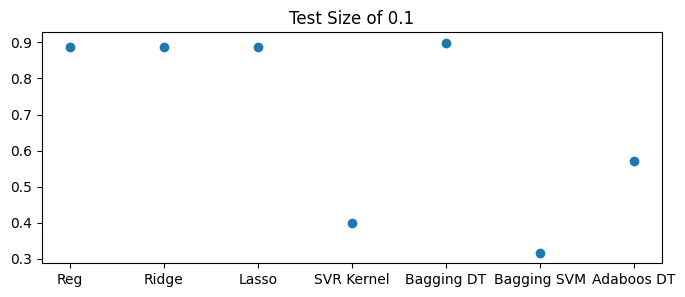

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

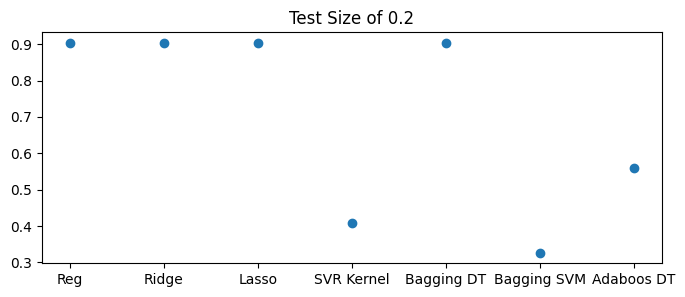

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

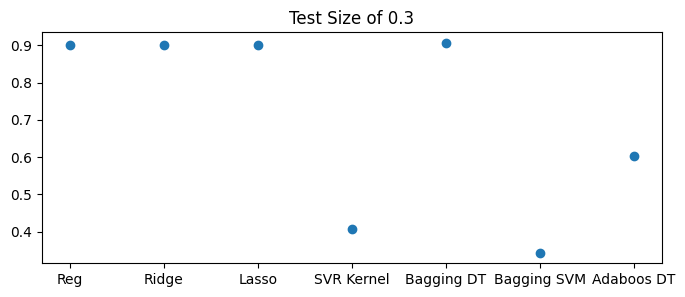

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

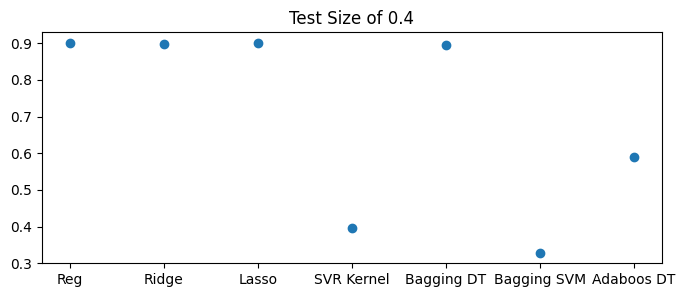

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

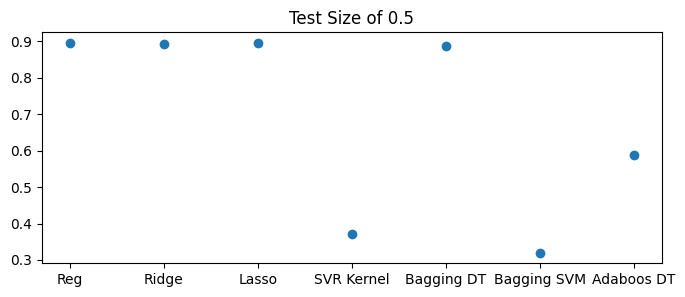

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score as R2

#size = 0.3
for size in np.arange(0.1,0.6,0.1):

# 30% test, 70% train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
  AL=['Reg','Ridge','Lasso','SVR Kernel','Bagging DT','Bagging SVM','Adaboos DT']
  RR=[]

  clf=LinearRegression()
  clf.fit(X_train,y_train)
  Result_Reg=clf.predict(X_test)
  R2_reg=R2(y_test,Result_Reg)
  RR.append(R2_reg)

  clf=Ridge(alpha=0.00010481131341546853)
  clf.fit(X_train,y_train)
  Result_Ridge=clf.predict(X_test)
  R2_Ridge=R2(y_test,Result_Ridge)
  RR.append(R2_Ridge)

  clf=Lasso(alpha=1.2648552168552958e-05)
  clf.fit(X_train,y_train)
  Result_Lasso=clf.predict(X_test)
  R2_Lasso=R2(y_test,Result_Lasso)
  RR.append(R2_Lasso)

  clf=svm.SVR(kernel='rbf', C=1, gamma=0.1)
  clf.fit(X_train,y_train)
  Result_Kernel=clf.predict(X_test)
  R2_Kernel=R2(y_test,Result_Kernel)
  RR.append(R2_Kernel)

  base_Regressor_dt = DecisionTreeRegressor(random_state=42)
  clf=BaggingRegressor(base_Regressor_dt, n_estimators=5, random_state=42)
  clf.fit(X_train,y_train)
  Result_Bagging_DT=clf.predict(X_test)
  R2_Bagging_DT=R2(y_test,Result_Bagging_DT)
  RR.append(R2_Bagging_DT)

  base_Regressor_svm = svm.SVR()
  clf=BaggingRegressor(base_Regressor_svm, n_estimators=5, random_state=42)
  clf.fit(X_train,y_train)
  Result_Bagging_SVM=clf.predict(X_test)
  R2_Bagging_SVM=R2(y_test,Result_Bagging_SVM)
  RR.append(R2_Bagging_SVM)

  weak_learner = DecisionTreeRegressor(max_depth=1, random_state=42)
  clf=AdaBoostRegressor(estimator=weak_learner, n_estimators=50, random_state=42)
  clf.fit(X_train,y_train)
  Result_Adaboos_DT=clf.predict(X_test)
  R2_Adaboos_DT=R2(y_test,Result_Adaboos_DT)
  RR.append(R2_Adaboos_DT)

  plt.figure(figsize=(8,3))

  #plt.plot(range(0,len(X_test)),y_test,'k.',range(0,len(X_test)),Result_Reg,'.',range(0,len(X_test)),Result_Ridge,'.')
  plt.plot(AL,RR,'o')
  plt.title("Test Size of {:.1f}".format(size))
  plt.show()

**Based on the Decision Tree "Density", "Chlorides" and "pH" have the top 3 influence factor. At this stage we remove all other features and only keep these three to evaluate wether it will improve our models.**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

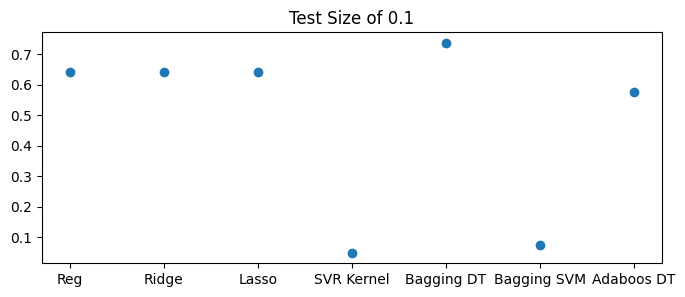

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

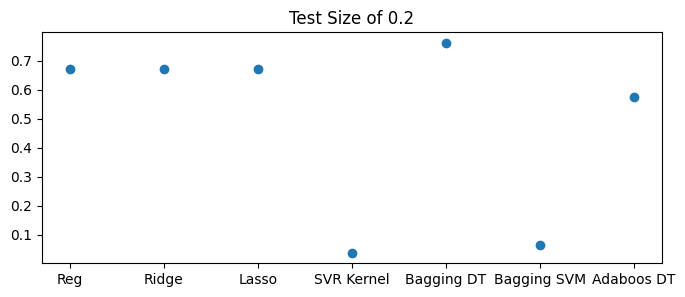

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

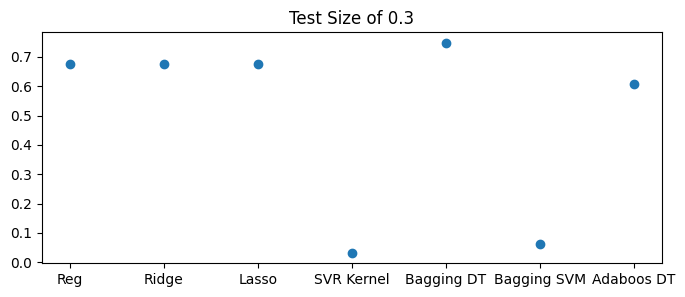

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

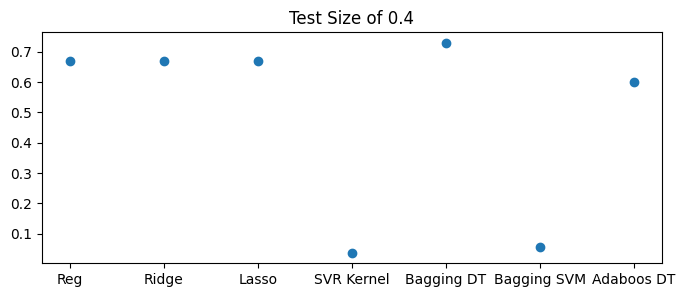

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

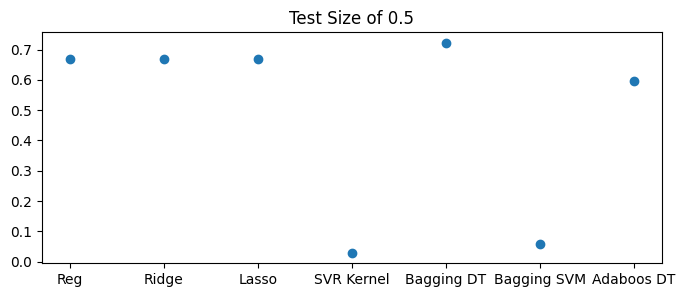

In [111]:
X= df[['density','chlorides','pH']]

for size in np.arange(0.1,0.6,0.1):

# 30% test, 70% train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
  AL=['Reg','Ridge','Lasso','SVR Kernel','Bagging DT','Bagging SVM','Adaboos DT']
  RR=[]

  clf=LinearRegression()
  clf.fit(X_train,y_train)
  Result_Reg=clf.predict(X_test)
  R2_reg=R2(y_test,Result_Reg)
  RR.append(R2_reg)

  clf=Ridge(alpha=0.00010481131341546853)
  clf.fit(X_train,y_train)
  Result_Ridge=clf.predict(X_test)
  R2_Ridge=R2(y_test,Result_Ridge)
  RR.append(R2_Ridge)

  clf=Lasso(alpha=1.2648552168552958e-05)
  clf.fit(X_train,y_train)
  Result_Lasso=clf.predict(X_test)
  R2_Lasso=R2(y_test,Result_Lasso)
  RR.append(R2_Lasso)

  clf=svm.SVR(kernel='rbf', C=1, gamma=0.1)
  clf.fit(X_train,y_train)
  Result_Kernel=clf.predict(X_test)
  R2_Kernel=R2(y_test,Result_Kernel)
  RR.append(R2_Kernel)

  base_Regressor_dt = DecisionTreeRegressor(random_state=42)
  clf=BaggingRegressor(base_Regressor_dt, n_estimators=5, random_state=42)
  clf.fit(X_train,y_train)
  Result_Bagging_DT=clf.predict(X_test)
  R2_Bagging_DT=R2(y_test,Result_Bagging_DT)
  RR.append(R2_Bagging_DT)

  base_Regressor_svm = svm.SVR()
  clf=BaggingRegressor(base_Regressor_svm, n_estimators=5, random_state=42)
  clf.fit(X_train,y_train)
  Result_Bagging_SVM=clf.predict(X_test)
  R2_Bagging_SVM=R2(y_test,Result_Bagging_SVM)
  RR.append(R2_Bagging_SVM)

  weak_learner = DecisionTreeRegressor(max_depth=1, random_state=42)
  clf=AdaBoostRegressor(estimator=weak_learner, n_estimators=50, random_state=42)
  clf.fit(X_train,y_train)
  Result_Adaboos_DT=clf.predict(X_test)
  R2_Adaboos_DT=R2(y_test,Result_Adaboos_DT)
  RR.append(R2_Adaboos_DT)

  plt.figure(figsize=(8,3))

  #plt.plot(range(0,len(X_test)),y_test,'k.',range(0,len(X_test)),Result_Reg,'.',range(0,len(X_test)),Result_Ridge,'.')
  plt.plot(AL,RR,'o')
  plt.title("Test Size of {:.1f}".format(size))
  plt.show()


# **Conclusion**


The figures indicate that the result is consistent between the various test sizes. Although, the decision three predicted that "Density", "Chlorides" and "pH" have the highest impact on the prediction. However, the training of the models soley based on these three features decreases the performance (R2) of the models.

Moreover, the Reg, Ridge, Lasso and Bagging DecisionTree are the best models due to a higher R2 values. While they are utilizing all the available features.



---

